# *Problema reto*: Distribuyendo empanadas con Montecarlo

**Grupo 3** : Ricardo Vaca, Pedro Ferreira, David Bellorin, Raffaella Martínez, Mario Trejo, Luis Viloria.

1. Extienda el código a m empanadas por persona. Verifique que el código reproduce los resultados del caso anterior (3 personas, 3 sabores de empanadas, 2 empanadas por persona).

2. Repita el cálculo para 3 personas, 3 sabores de empanadas y 3 empanadas por persona. Explique los resultados.

3. Repita el cálculo usando parámetros de su escogencia. ¿Tienen sentido los resultados? Explique


# Código

El código extendido para el caso de $n$ personas con $m$ empanadas por persona y $k$ sabores de empanadas es el siguiente:

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
def main():
    n = int(input("Numero de personas: "))
    m = int(input("Numero de empanadas por persona: "))
    k = int(input("Numero de sabores de empanadas: "))
    i = int(input("Numero de samples: "))
    j = int(input("Numero de iteraciones para estimacion por Montecarlo: "))
    Montecarlo(n,m,k,i,j)

def samples(n,m,k,nsamples):
    """
    Parameters
    ----------
    n : int
        Numero de personas.
    m : int
        Numero de empanadas por persona.
    k : int
        Numero de sabores de empanadas.
    nsamples: int
        Numero de samples
        
    Returns
    -------
    Favorables : int
      Numero de casos favorables en la muestra
    Desfavorables : int
      Numero de casos desfavorables en la muestra
    """

    N_empanadas = m * n

    Empanadas = np.array([i for i in range(k) for j in range(m)])

    Samples = [np.random.choice(Empanadas,size = N_empanadas, replace=False) for i in range(nsamples)]

    Duplicaciones = sum([revisar_duplicaciones(sample,m) for sample in Samples])

    Favorables = nsamples-Duplicaciones

    return Favorables,Duplicaciones

def revisar_duplicaciones(v,m):
    """
    Parameters
    ----------
    v : Array
        el vector que queremos revisar si hay casos de duplicaciones.
    m : int
        Numero de empanadas por persona.
  
    Returns
    -------
    dup : int
        [0,1] Resultado si hay o no duplicacion.
        """
    for i in range(0, v.size, m):
      if np.unique(v[i:i+m]).size != m:
        return 1
    return 0

def Montecarlo(npersonas,nempanadas,nsabores,nsamples,niter):
    """
    Parameters
    ----------
    npersonas : int
        Numero total de personas.
    nempanadas : int
        Numero de empanadas por persona.
    nsabores : int
        Numero de sabores de empanadas.
    nsamples : int
        Numero de muestras por cada iteracion.
    niter : int
        Numero de iteraciones para estimacion por Montecarlo.

    Returns
    -------
    Tasa_Favorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos favorables 
        para cada iteracion.
    Tasa_Desfavorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos desfavorables 
        para cada iteracion.
    """

    Evals = np.array([samples(npersonas,nempanadas,nsabores,nsamples) for i in tqdm(range(niter))])
    Radio_DF = Evals[:,1]/Evals[:,0] #Desfavorables/Favorables
    Tasa_Favorables = 1/((Radio_DF)+1) #Favorables/Totales
    Tasa_Desfavorables = 1 - Tasa_Favorables 
    Analisis(Tasa_Favorables,Tasa_Desfavorables)
    return Tasa_Favorables,Tasa_Desfavorables
    
def Analisis(T_F,T_D):
    T_Fm = np.mean(T_F)
    T_Fs = np.std(T_F)
    T_Dm = np.mean(T_D)
    T_Ds = np.std(T_D)
    print('\n La tasa de casos favorables media es : {:.4f} +/- {:.4f}'.format(T_Fm,T_Fs))
    print('\n La tasa de casos desfavorables media es : {:.4f} +/- {:.4f}'.format(T_Dm,T_Ds))

main()

'''
def revisar_duplicaciones(v,m):
    for i in range(0,len(v),m):
        for j in range(0,m):
            for k in range(j+1,m):
                if v[i+j] == v[i+k]: return 1
    return 0
'''


# Resultados
En este caso, utilizamos el mismo número de samples (10000) y el mismo número de iteraciones (1000) que se utilizaron en el código original.

###1. Para tres personas, tres sabores y dos empanadas por persona:

Tasa de casos favorables media: $0.5331 \pm 0.0050.$

Tasa de casos desfavorables media: $ 0.4669 \pm 0.0050.$

Recordamos que, con el código anterior se obtuvieron los siguientes resultados:

    *La tasa de casos favorables media es : 0.5335 +/- 0.0049

    *La tasa de casos desfavorables media es : 0.4665 +/- 0.0049


Y la solución teórica:

$\frac{D}{T} = \frac{7}{15} \approx 0.4666...$

$\frac{F}{T} = \frac{8}{15} \approx 0.5333...$



 ### 2. Para tres empanadas, tres sabores y tres empanadas por persona: 
 
 
 La tasa de casos favorables media es : $0.1284 \pm 0.0033.$

 La tasa de casos desfavorables media es : $0.8716 \pm 0.0033$

 Vemos que en este caso es mucho más probable que se repitan empanadas en comparación con el caso anterior.

La función de probabilidad de que no se repitan las empanadas debe ser creciente al aumentar el número de sabores. Por el contrario, debería disminuir al aumentar el número de personas y el número de empanadas por persona. Podemos añadir  que  la función de probabilidad también será inversamente proporcional al aumento conjunto del número de personas y el número de empanadas por persona. 



### 3. Casos con parámetros escogidos


### Probemos lo evidente:

Para 4 personas, 5 empanadas por persona, 4 sabores, siempre se repetirán 
empanadas. El resultado que obtuvimos es:

Tasa de casos favorables media es : $0.000 \pm 0.0000.$

Tasa de casos desfavorables media es : $1.000 \pm 0.0000.$


#### Aumentando el número de sabores:
En primer lugar, veremos qué ocurre cuando aumentamos el número de sabores de empanadas dejando el número de personas y empanadas por persona:

 * *Para 3 personas, 2 empanadas por persona, 4 sabores:*

Tasa de casos favorables media: $0.6475 \pm 0.0048.$

Tasa de casos desfavorables media: $ 0.3525 \pm 0.0048.$


* *Para 3 personas, 2 empanadas por persona, 5 sabores:*

Tasa de casos favorables media es : $0.7112 \pm 0.0045.$

Tasa de casos desfavorables media es : $0.2888 \pm 0.0045.$


* *Para 3 personas, 2 empanadas por persona, 6 sabores*

Tasa de casos favorables media es : $0.7560 \pm 0.0042.$

Tasa de casos desfavorables media es : $0.2440 \pm 0.0042.$



Text(0, 0.5, 'Probabiildad de que no se repitan')

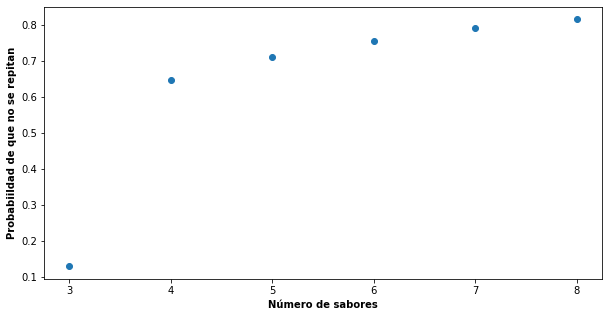

In [ ]:
# Graficamos el resultado para 
x=[3,4,5,6,7,8]
f_x=[0.1284, 0.6475,0.7112,0.7560,0.7895, 0.8149]

fig = plt.figure(figsize=(10,5))
plt.scatter(x, f_x)
#plt.suptitle(r'Probabilidad de que no se repitan al variar el número de sabores',fontweight='bold')
plt.xlabel('Número de sabores',fontweight='bold')
plt.ylabel('Probabiildad de que no se repitan',fontweight='bold')

#### Aumentando el número de personas y sabores (dos empanadas por persona):

Vemos qué ocurre si aumentamos en conjunto el número de empanadas y el número de sabores

* *Para 5 personas, 2 empanadas por persona, 5 sabores*

Tasa de casos favorables media es : $0.5755 \pm 0.0051.$

Tasa de casos desfavorables media es : $0.4245 \pm 0.0051.$

* *Para 6 personas, 2 empanadas por persona, 6 sabores*

Tasa de casos favorables media es : $0.5810 \pm 0.0047.$

Tasa de casos desfavorables media es : $0.4190 \pm 0.0047.$


 

---




Text(0, 0.5, 'Probabilidad de que no se repitan')

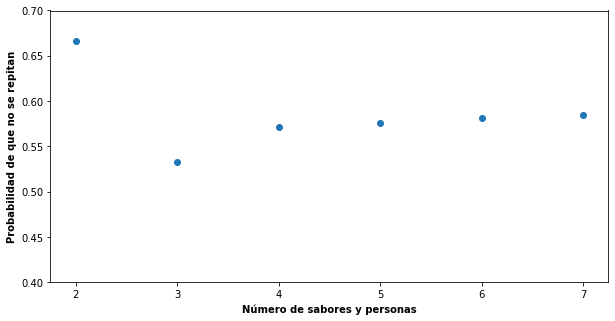

In [ ]:
# Graficamos el resultado para 
x=[2,3,4,5,6,7]
f_x=[0.666, 0.5331, 0.5713 , 0.5755,0.5810, 0.5845]


fig = plt.figure(figsize=(10,5))
plt.ylim(0.4,0.7)
plt.scatter(x, f_x)
#plt.suptitle(r'Probabilidad de que no se repitan al variar el número de sabores',fontweight='bold')
plt.xlabel('Número de sabores y personas',fontweight='bold')
plt.ylabel('Probabilidad de que no se repitan',fontweight='bold')

###Una curiosidad

¿Qué pasa si colocamos el mismo número de personas, empanadas y sabores?



Text(0, 0.5, 'Probabiildad de que no se repitan')

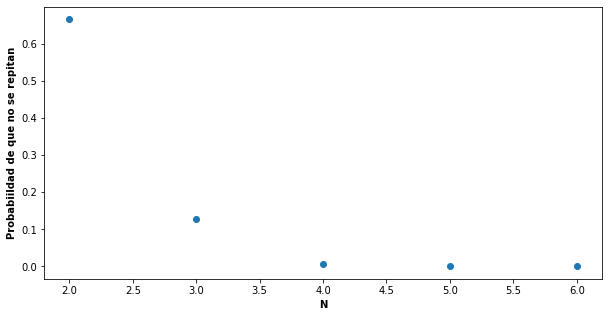

In [ ]:
# Graficamos el resultado para 
x=[2,3,4,5,6]
f_x=[0.666,0.1284, 0.0053, 0  ,0 ]


fig = plt.figure(figsize=(10,5))
plt.scatter(x, f_x)
#plt.suptitle(r'Probabilidad de que no se repitan al variar el número de sabores',fontweight='bold')
plt.xlabel('N',fontweight='bold')
plt.ylabel('Probabiildad de que no se repitan',fontweight='bold')